### t2.micro, AWS Marketplace -> Anaconda with Python 3

http://docs.h2o.ai/h2o/latest-stable/h2o-docs/booklets/GLMBooklet.pdf

H2O’s GLM implementation presents a high-performance distributed algorithm that scales linearly with the number of rows and works extremely well for datasets with a limited number of active predictors.

GLM can produce two categories of models: classification (binary classification only) and regression. Logistic regression is the GLM to perform binary classification.

The data type of the response column determines the model category. If the response is a categorical variable (also called a factor or an enum), then a classification model is created. If the response column data type is numeric (either integer or real), then a regression model is created.

If the response column is categorical, then a classification model is created. GLM only supports binary classification, so the response column may only have two levels. Categorical predictor columns may have more than two levels.

Avoid one-hot encoding categorical columns with many levels into many binary columns as this is very inefficient. This is especially true for Python users who are accustomed to expanding categorical variables manually for other frameworks.

For nano-fast scoring, H2O GLM models can be directly rendered as a Plain Old Java Object (POJO). POJOs are very low-latency and can easily be embedded in any Java environment (a customer-facing web application, a Storm bolt, or a Spark Streaming pipeline, for example). The POJO does nothing but pure math, and has no dependencies on any other software packages (not even H2O), so it is easy to implement.

### 1) Linear Regression (Gaussian Family)

Linear regression corresponds to the Gaussian family model: the link function g is the identity and the density f corresponds to a normal distribution. It is the simplest example of a GLM, but has many uses and several advantages over other families. For instance, it is faster and requires more stable computations.

In [2]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

h2o.init()

gaussian_fit = H2OGeneralizedLinearEstimator(family = 'gaussian')
gaussian_fit.train(
    y              = 'VOL'                                                                                          ,
    x              = ['AGE', 'RACE', 'PSA', 'GLEASON']                                                              ,
    training_frame = h2o.import_file('http://h2o-public-test-data.s3.amazonaws.com/smalldata/prostate/prostate.csv')
                  )

print(gaussian_fit.summary())
print(gaussian_fit.pprint_coef())

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,22 secs
H2O cluster timezone:,UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,1 day
H2O cluster name:,H2O_from_python_ec2_user_a9fcq3
H2O cluster total nodes:,1
H2O cluster free memory:,588 Mb
H2O cluster total cores:,1
H2O cluster allowed cores:,1
H2O cluster status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%
GLM Model: summary



,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,"Elastic Net (alpha = 0.5, lambda = 0.003889 )",4,4,1,prostate1.hex



Coefficients: glm coefficients



names,coefficients,standardized_coefficients
Intercept,-2.2855272,15.8129211
AGE,0.3104351,2.0262322
RACE,4.6805412,1.4452260
PSA,0.0292755,0.5854389
GLEASON,-1.2437918,-1.3581626



None


### 2) Logistic Regression (Binomial Family)

Logistic regression is used for binary classification problems where the response is a categorical variable with two levels. It models the probability of an observation belonging to an output category given the data. The canonical link for the binomial family is the logit function (also known as log odds). Its inverse is the logistic function, which takes any real number and
projects it onto the [0, 1] range as desired to model the probability of belonging to a class. The corresponding s-curve (or sigmoid function) is shown below:

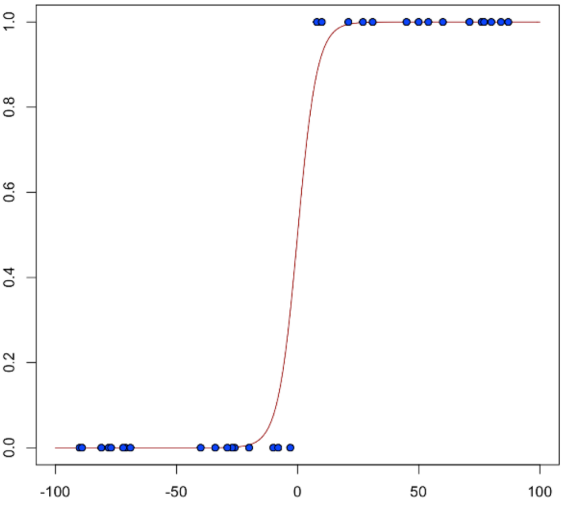

In [45]:
from IPython.display import Image
Image('Sigmoid.png', width=200, height=200)

In [2]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

h2o.init()

h2o_df            = h2o.import_file('http://h2o-public-test-data.s3.amazonaws.com/smalldata/prostate/prostate.csv')
h2o_df['CAPSULE'] = h2o_df['CAPSULE'].asfactor()

binomial_fit = H2OGeneralizedLinearEstimator(family = 'binomial')
binomial_fit.train(
                   y              = 'CAPSULE'                        , 
                   x              = ['AGE', 'RACE', 'PSA', 'GLEASON'], 
                   training_frame = h2o_df
                  )

print(binomial_fit.summary())
print(binomial_fit.pprint_coef())     

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,12 secs
H2O cluster timezone:,UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,1 day
H2O cluster name:,H2O_from_python_ec2_user_ae0k2c
H2O cluster total nodes:,1
H2O cluster free memory:,630 Mb
H2O cluster total cores:,1
H2O cluster allowed cores:,1
H2O cluster status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%
GLM Model: summary



,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 4.445E-4 )",4,4,4,py_2_sid_a158



Coefficients: glm coefficients



names,coefficients,standardized_coefficients
Intercept,-5.8676043,-0.4671431
AGE,-0.0208192,-0.1358885
RACE,-0.4571647,-0.1411602
PSA,0.0278816,0.5575652
GLEASON,1.0718003,1.1703560



None


### 3) Logistic Ordinal Regression (Ordinal Family)

A logistic ordinal regression model is a generalized linear model that predicts ordinal variables - variables that are discreet, as in classification, but that can be ordered, as in regression.

In [2]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

h2o.init()

h2o_df        = h2o.import_file('http://h2o-public-test-data.s3.amazonaws.com/bigdata/laptop/glm_ordinal_logit/ordinal_multinomial_training_set.csv')
h2o_df['C11'] = h2o_df['C11'].asfactor()

ordinal_fit = H2OGeneralizedLinearEstimator(
                                            family            = 'ordinal'  ,
                                            alpha             = 1.0        ,
                                            lambda_           = 0.000000001,
                                            obj_reg           = 0.00001    ,
                                            max_iterations    = 1000       ,
                                            beta_epsilon      = 1e-8       ,
                                            objective_epsilon = 1e-10
                                           )

ordinal_fit.train(
                  x              = list(range(0,10)),
                  y              = 'C11',
                  training_frame = h2o_df
                 )

print(ordinal_fit.summary())
print(ordinal_fit.pprint_coef())

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,16 secs
H2O cluster timezone:,UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,1 day
H2O cluster name:,H2O_from_python_ec2_user_3q38fl
H2O cluster total nodes:,1
H2O cluster free memory:,581 Mb
H2O cluster total cores:,1
H2O cluster allowed cores:,1
H2O cluster status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%
GLM Model: summary



,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,ordinal,ologit,Lasso (lambda = 1.0E-9 ),66,49,1,py_2_sid_b2dd



Coefficients: glm multinomial coefficients



names,coefs_class_0,coefs_class_1,coefs_class_2,coefs_class_3,coefs_class_4,coefs_class_5,std_coefs_class_0,std_coefs_class_1,std_coefs_class_2,std_coefs_class_3,std_coefs_class_4,std_coefs_class_5
Intercept,-5.3400517,-4.2706276,-4.0596078,-2.1366286,-0.5816070,0.0,-5.3399239,-4.2704998,-4.0594800,-2.1365008,-0.5814792,0.0
C1,0.0286530,0.0286530,0.0286530,0.0286530,0.0286530,0.0,0.0330794,0.0330794,0.0330794,0.0330794,0.0330794,0.0
C2,0.0129029,0.0129029,0.0129029,0.0129029,0.0129029,0.0,0.0148736,0.0148736,0.0148736,0.0148736,0.0148736,0.0
C3,0.0232305,0.0232305,0.0232305,0.0232305,0.0232305,0.0,0.0268658,0.0268658,0.0268658,0.0268658,0.0268658,0.0
C4,-0.0618561,-0.0618561,-0.0618561,-0.0618561,-0.0618561,0.0,-0.0715360,-0.0715360,-0.0715360,-0.0715360,-0.0715360,0.0
C5,-0.0848549,-0.0848549,-0.0848549,-0.0848549,-0.0848549,0.0,-0.0976840,-0.0976840,-0.0976840,-0.0976840,-0.0976840,0.0
C6,0.0925390,0.0925390,0.0925390,0.0925390,0.0925390,0.0,0.1071068,0.1071068,0.1071068,0.1071068,0.1071068,0.0
C7,-0.1229714,-0.1229714,-0.1229714,-0.1229714,-0.1229714,0.0,-0.1417589,-0.1417589,-0.1417589,-0.1417589,-0.1417589,0.0
C8,-0.1024690,-0.1024690,-0.1024690,-0.1024690,-0.1024690,0.0,-0.1182264,-0.1182264,-0.1182264,-0.1182264,-0.1182264,0.0
C9,0.0229753,0.0229753,0.0229753,0.0229753,0.0229753,0.0,0.0265390,0.0265390,0.0265390,0.0265390,0.0265390,0.0



None


### 4) Multi-class classification (Multinomial Family)

Multinomial family generalization of the binomial model is used for multi-class response variables.

In [2]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

h2o.init()

multinomial_fit = H2OGeneralizedLinearEstimator(family = "multinomial")
multinomial_fit.train(
    y              = 4                                                                                      ,
    x              = [0,1,2,3]                                                                              ,
    training_frame = h2o.import_file('http://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris.csv')
                     )

print(multinomial_fit.summary())
print(multinomial_fit.pprint_coef())

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,12 secs
H2O cluster timezone:,UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,1 day
H2O cluster name:,H2O_from_python_ec2_user_mdwc93
H2O cluster total nodes:,1
H2O cluster free memory:,630 Mb
H2O cluster total cores:,1
H2O cluster allowed cores:,1
H2O cluster status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%
GLM Model: summary



,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,multinomial,multinomial,"Elastic Net (alpha = 0.5, lambda = 8.67E-4 )",15,11,23,iris1.hex



Coefficients: glm multinomial coefficients



names,coefs_class_0,coefs_class_1,coefs_class_2,std_coefs_class_0,std_coefs_class_1,std_coefs_class_2
Intercept,6.6686907,-0.0520809,-18.3671186,-4.0062426,-0.0637544,-8.5615872
C1,-1.5259969,1.1180834,0.0,-1.2636263,0.9258470,0.0
C2,3.6977181,-0.8457616,-3.6351031,1.6033095,-0.3667174,-1.5761600
C3,-2.0546735,-0.5727868,3.3334309,-3.6253079,-1.0106368,5.8815735
C4,-4.4449583,-1.5092908,6.9893332,-3.3922177,-1.1518315,5.3339847



None


### 5) Poisson Models

Poisson regression is typically used for datasets where the response represents counts and the errors are assumed to have a Poisson distribution. In general, it can be applied to any data where the response is non-negative.

In [2]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

h2o.init()

poisson_fit = H2OGeneralizedLinearEstimator(family = 'poisson')
poisson_fit.train(
    y              = 'Claims'                                                                                                                 ,
    x              = ['Payment', 'Insured', 'Kilometres', 'Zone', 'Bonus', 'Make']                                                            ,
    training_frame = h2o.import_file('http://h2o-public-test-data.s3.amazonaws.com/smalldata/glm_test/Motor_insurance_sweden.txt', sep = '\t')
                 )

print(poisson_fit.summary())
print(poisson_fit.pprint_coef())

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,12 secs
H2O cluster timezone:,UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,1 day
H2O cluster name:,H2O_from_python_ec2_user_g5pa1d
H2O cluster total nodes:,1
H2O cluster free memory:,630 Mb
H2O cluster total cores:,1
H2O cluster allowed cores:,1
H2O cluster status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%
GLM Model: summary



,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,poisson,log,"Elastic Net (alpha = 0.5, lambda = 0.4014 )",6,6,6,Motor_insurance_sweden1.hex



Coefficients: glm coefficients



names,coefficients,standardized_coefficients
Intercept,2.6094420,3.1632499
Kilometres,-0.2410513,-0.3399808
Zone,-0.1176072,-0.2339039
Bonus,0.1263855,0.2528363
Make,0.2284745,0.5910505
Insured,-0.0000542,-0.3071161
Payment,0.0000006,0.6007427



None


### 6) Gamma Models

The gamma distribution is useful for modeling a positive continuous response variable, where the conditional variance of the response grows with its mean but the coefficient of variation of the response is constant.

In [2]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

h2o.init()

gamma_inverse = H2OGeneralizedLinearEstimator(
                                              family = 'gamma'  ,
                                              link   = 'inverse'
                                             )

gamma_inverse.train(
    y              = 'DPROS'                                                                                        ,
    x              = ['AGE','RACE','CAPSULE','DCAPS','PSA','VOL']                                                   ,
    training_frame = h2o.import_file('http://h2o-public-test-data.s3.amazonaws.com/smalldata/prostate/prostate.csv')
                   )

print(gamma_inverse.summary())
print(gamma_inverse.pprint_coef())

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,13 secs
H2O cluster timezone:,UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,1 day
H2O cluster name:,H2O_from_python_ec2_user_m3ace9
H2O cluster total nodes:,1
H2O cluster free memory:,630 Mb
H2O cluster total cores:,1
H2O cluster allowed cores:,1
H2O cluster status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%
GLM Model: summary



,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gamma,inverse,"Elastic Net (alpha = 0.5, lambda = 6.487E-4 )",6,6,4,prostate1.hex



Coefficients: glm coefficients



names,coefficients,standardized_coefficients
Intercept,0.5390240,0.4514004
CAPSULE,-0.1005734,-0.0493890
AGE,0.0010464,0.0068299
RACE,-0.0296812,-0.0091648
DCAPS,-0.0686619,-0.0213303
PSA,-0.0006400,-0.0127984
VOL,0.0001238,0.0022710



None


### 7) Tweedie Models

Tweedie distributions are a family of distributions which include gamma, normal, Poisson and their combination. It is especially useful for modeling positive continuous variables with exact zeros.

In [2]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

h2o.init()

h2o_df = h2o.import_file('http://h2o-public-test-data.s3.amazonaws.com/smalldata/glm_test/auto.csv')

tweedie_fit = H2OGeneralizedLinearEstimator(family = 'tweedie')
tweedie_fit.train(
                  y              = 'y'                 ,
                  x              = h2o_df.col_names[1:],
                  training_frame = h2o_df
                 )

print(tweedie_fit.summary())
print(tweedie_fit.pprint_coef())

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,14 secs
H2O cluster timezone:,UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,1 day
H2O cluster name:,H2O_from_python_ec2_user_ji8bbm
H2O cluster total nodes:,1
H2O cluster free memory:,626 Mb
H2O cluster total cores:,1
H2O cluster allowed cores:,1
H2O cluster status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%
GLM Model: summary



,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,tweedie,tweedie,"Elastic Net (alpha = 0.5, lambda = 0.00707 )",56,52,4,auto1.hex



Coefficients: glm coefficients



names,coefficients,standardized_coefficients
Intercept,0.8630572,4.1122710
x.CAR_TYPE_2,0.1890505,0.0710238
x.CAR_TYPE_3,0.2268325,0.1022431
x.CAR_TYPE_4,1.0188265,0.3309518
x.CAR_TYPE_5,-0.1474098,-0.0669135
---,---,---
x.REVOLKED,9.6221932,3.3154871
x.GENDER,-0.3596848,-0.1789804
x.MARRIED,-0.3070563,-0.1498012
x.PARENT1,-0.3248995,-0.1100975



See the whole table with table.as_data_frame()

None


### 8) Negative Binomial Models

Negative binomial regression is a generalization of Poisson regression that loosens the restrictive assumption that the variance is equal to the mean. Instead, the variance of negative binomial is a function of its mean and the dispersion parameter.

In [2]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

h2o.init()

negativebinomial_fit = H2OGeneralizedLinearEstimator(
                                                     family = 'negativebinomial',
                                                     link   = 'identity'        ,
                                                     theta  = 0.5
                                                    )

negativebinomial_fit.train(
    x              = ['Payment', 'Insured', 'Kilometres', 'Zone', 'Bonus', 'Make']                                                ,
    y              = 'Claims'                                                                                                     ,
    training_frame = h2o.import_file('http://h2o-public-test-data.s3.amazonaws.com/smalldata/glm_test/Motor_insurance_sweden.txt')
                          )

print(negativebinomial_fit.summary())
print(negativebinomial_fit.pprint_coef())

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,12 secs
H2O cluster timezone:,UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,1 day
H2O cluster name:,H2O_from_python_ec2_user_3ukodo
H2O cluster total nodes:,1
H2O cluster free memory:,630 Mb
H2O cluster total cores:,1
H2O cluster allowed cores:,1
H2O cluster status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%
GLM Model: summary



,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,negativebinomial,identity,"Elastic Net (alpha = 0.5, lambda = 2.873E-4 )",6,0,0,Motor_insurance_sweden1.hex



Coefficients: glm coefficients



names,coefficients,standardized_coefficients
Intercept,51.8657195,51.8657195
Kilometres,0.0,0.0
Zone,0.0,0.0
Bonus,0.0,0.0
Make,0.0,0.0
Insured,0.0,0.0
Payment,0.0,0.0



None
